<a href="https://colab.research.google.com/github/rockingkamal/NLP/blob/main/Sentiment_Classify_with_And_without_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://www.kaggle.com/code/sasakitetsuya/sentiment-classify-with-without-text

In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
import re
import string
from wordcloud import WordCloud
from collections import Counter

In [6]:
from nltk import sent_tokenize, word_tokenize , punkt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [9]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
import time
import datetime as dt

#from keras.utils.vis_utils import plot_model
#ModuleNotFoundError: No module named 'keras.utils.vis_utils'
#pip install --upgrade keras


DATA PREPROCESSING

In [50]:
#Data importing

data = pd.read_csv("/content/sentiment-analysis.csv")
data.head(5)

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [51]:
 #Data cleaning
data = data['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)
data.head(2)

,0,1,2,3,4,5,6
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
...,...,...,...,...,...,...,...
93,"""I can't stop listening to this song. It's my ...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91
94,"""Their website is so confusing and poorly desi...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68
95,"""I had an incredible experience at the theme p...",Positive,Trip Report,2023-07-03 14:40:05,thrillseeker1,Orlando,0.89
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
data = data.set_axis(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'], axis=1)

data.head(2)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
5,"""The quality of this product is subpar.""",Negative,Amazon Reviews,2023-06-16 10:15:27,shopper123,San Francisco,0.72
6,"""I can't stop listening to this song. It's inc...",Positive,Spotify,2023-06-16 13:40:18,musiclover456,Berlin,0.91
7,"""Their website is so user-friendly. Love it!""",Positive,Website Testimonial,2023-06-16 16:05:36,testimonialuser1,Sydney,0.87
8,"""I loved the movie! It was fantastic!""",Positive,IMDb,2023-07-02 09:12:34,user123,New York,0.92
9,"""The customer service was terrible.""",Negative,Yelp Reviews,2023-07-02 10:45:21,user456,Los Angeles,0.65


In [53]:
#Drop NaN
data = data.dropna()

In [54]:
#convert date and time to datetime

data['Date/Time']= pd.to_datetime(data['Date/Time'])

In [55]:
data['Month']= data['Date/Time'].dt.month
data['Day']= data['Date/Time'].dt.day
data['Year']= data['Date/Time'].dt.year

In [56]:
data.head(100)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Month,Day,Year
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,6,15,2023
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,6,15,2023
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,6,15,2023
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,6,15,2023
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,6,16,2023
...,...,...,...,...,...,...,...,...,...,...
91,"""Just had the most amazing vacation! I can't w...",Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93,7,2,2023
92,"""The food at this restaurant was awful. Never ...",Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55,7,2,2023
93,"""I can't stop listening to this song. It's my ...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91,7,3,2023
94,"""Their website is so confusing and poorly desi...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68,7,3,2023


In [24]:
#spliting the text(sentence) to individual words

data['Total Words'] = data['Text'].apply(lambda x: len(x.split()))

#count the total words from the text(sentence)

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["Text"].apply(count_total_words)


In [25]:
#convert all the words to lower case

def convert_lowercase(text):
    text = text.lower()
    return text

data['Text'] = data['Text'].apply(convert_lowercase)

In [26]:
#Remove punctuations

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['Text'] = data['Text'].apply(remove_punc)

In [27]:
#Removing stop words(a, is, the, i, was, to,...)


def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['Text'] = data['Text'].apply(remove_stopwords)

In [28]:
#Stemming method is used to cut down the characters to root words

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['Text'] = data['Text'].apply(perform_stemming)


data['Total Words After Transformation'] = data['Text'].apply(lambda x: np.log(len(x.split())))


In [29]:
data.head(2)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Month,Day,Year,Total Words,Total Chars,Total Words After Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,6,15,2023,4,19,0.693147
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,6,15,2023,4,24,0.693147


## **Alternative code from chatGPT**



In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer

# Assuming 'data' is your DataFrame

# Function to calculate the total words in a text
total_words = FunctionTransformer(lambda x: np.array([len(str(x).split()) for x in x]), validate=False)

# Function to calculate the total characters in a text
total_chars = FunctionTransformer(lambda x: np.array([len(str(x)) for x in x]), validate=False)

# Function to calculate the total words after transformation (e.g., stemming, lemmatization)
def transform_text(Text):
    # Apply your transformation method here
    return Text.upper()

# Apply the transformation to the text column
data['text_transformed'] = data['Text'].apply(transform_text)

# Count Vectorizer for words after transformation
cv = CountVectorizer()
cv_transformed = cv.fit_transform(data['text_transformed'])

# Get the total words after transformation
total_words_after_transformation = FunctionTransformer(lambda x: np.array([cv_transformed.shape[1] for _ in x]), validate=False)

# Apply the transformers to the text column
data['Total_Words'] = total_words.fit_transform(data['Text'])
data['Total_Chars'] = total_chars.fit_transform(data['Text'])
data['Total_Words_After_Transformation'] = total_words_after_transformation.fit_transform(data['text_transformed'])

# Display the DataFrame
data.head(5)


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Month,Day,Year,Total Words,Total Chars,Total Words After Transformation,text_transformed,Total_Words,Total_Chars,Total_Words_After_Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,6,15,2023,2,11,0.693147,LOVE PRODUCT,2,12,217
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,6,15,2023,2,13,0.693147,SERVIC TERRIBL,2,14,217
2,movi amaz,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,6,15,2023,2,8,0.693147,MOVI AMAZ,2,9,217
3,im disappoint custom support,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,6,15,2023,4,25,1.386294,IM DISAPPOINT CUSTOM SUPPORT,4,28,217
4,best meal life,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,6,16,2023,3,12,1.098612,BEST MEAL LIFE,3,14,217


## **Visualization**

<Axes: xlabel='Sentiment', ylabel='Count'>

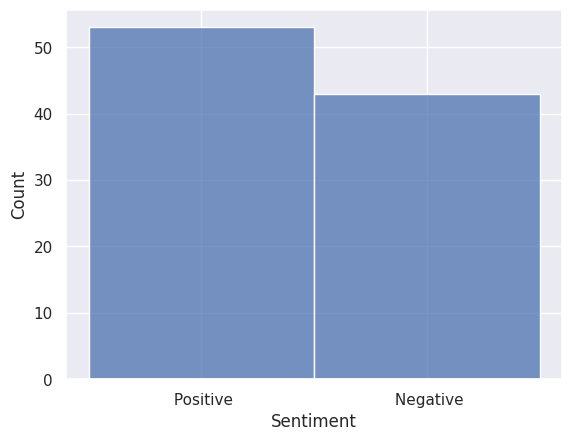

In [25]:
#Histplot by Sentiment 'Positive' and 'Negative'

sns.histplot(data= data, x = 'Sentiment' )


<Axes: xlabel='Count', ylabel='Source'>

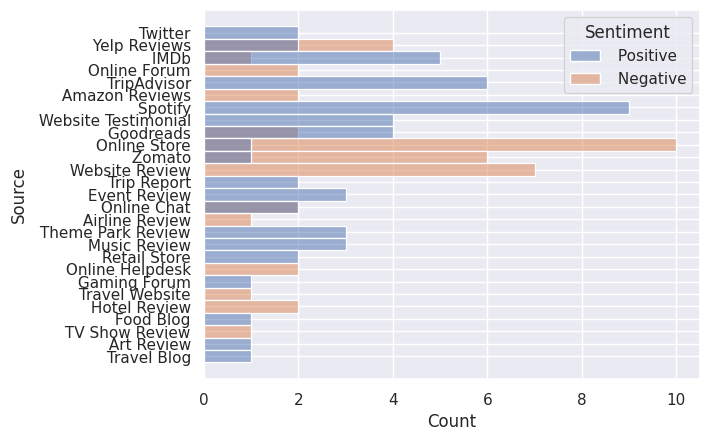

In [26]:
#Histplot by 'Source' and 'Sentiment'

sns.histplot(data=data, y='Source', hue='Sentiment')

In [27]:
data['Confidence Score']=data['Confidence Score'].astype(float)
data['Confidence Score']

0     0.85
1     0.65
2     0.92
3     0.78
4     0.88
      ... 
91    0.93
92    0.55
93    0.91
94    0.68
95    0.89
Name: Confidence Score, Length: 96, dtype: float64

<Axes: xlabel='Confidence Score', ylabel='Count'>

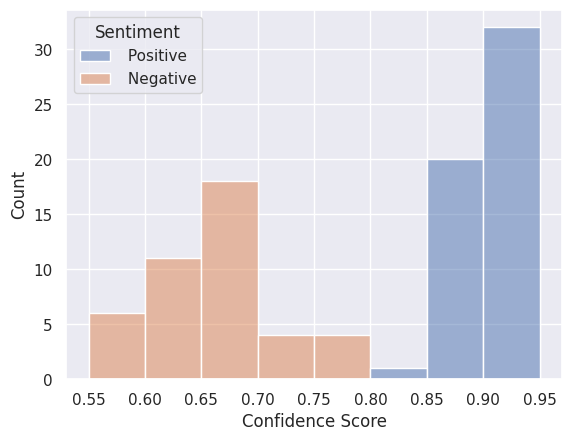

In [28]:
sns.histplot(data=data,x='Confidence Score',hue='Sentiment')

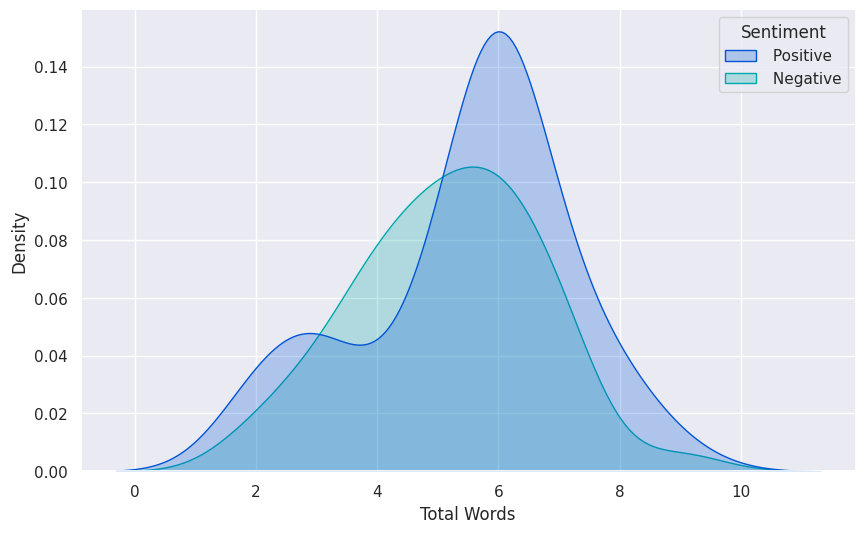

In [29]:
#Kdeplot by 'Total Words' and 'Sentiment'

plt.figure(figsize = (10,6))
sns.kdeplot(x = data['Total Words'], hue = data['Sentiment'], palette='winter', shade = True)
plt.show()

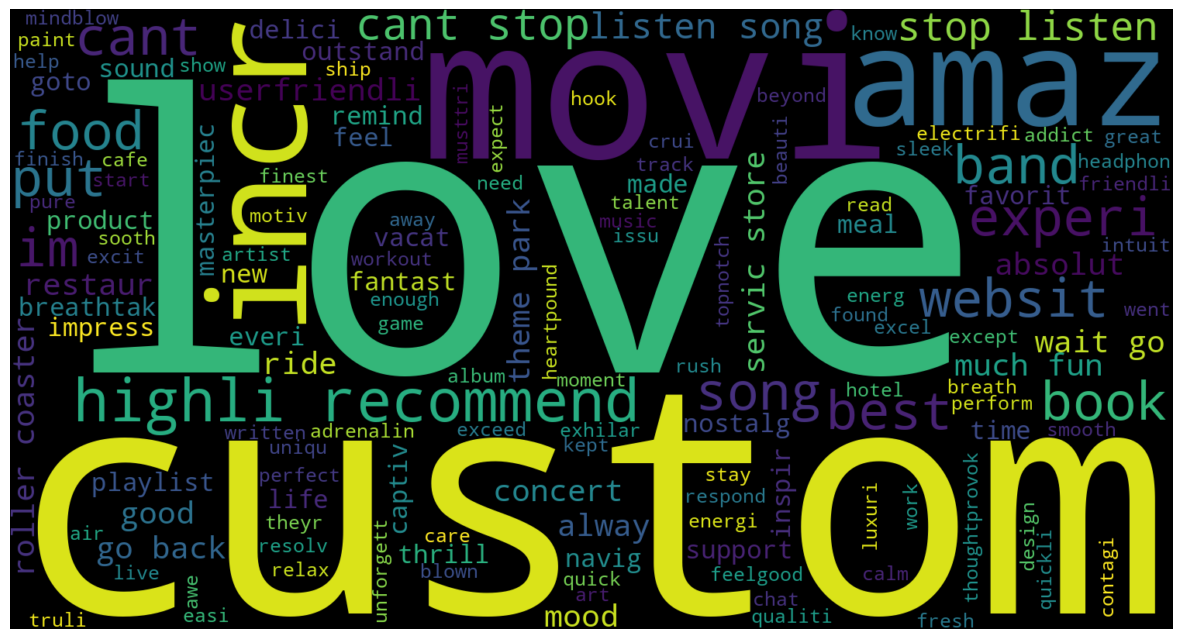

In [30]:
#Wordcloud by Sentiment = Positive

text = " ".join(data[data['Sentiment'] == ' Positive']['Text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

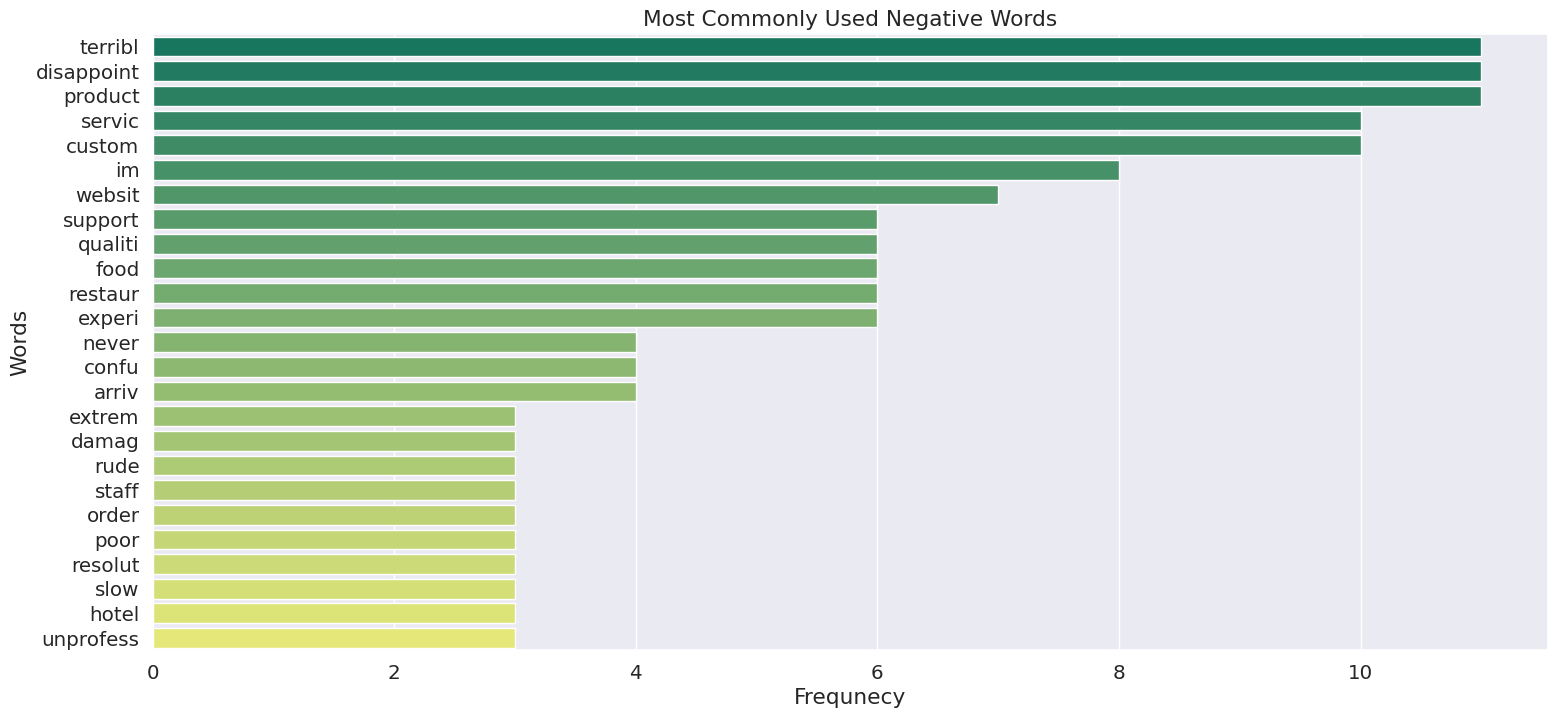

In [31]:
#Barplot by Top 25 Negative Words

all_negative_words = []
for sentence in data[data['Sentiment'] == ' Negative']['Text'].to_list():
    for word in sentence.split():
        all_negative_words.append(word)

df = pd.DataFrame(Counter(all_negative_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Negative Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()


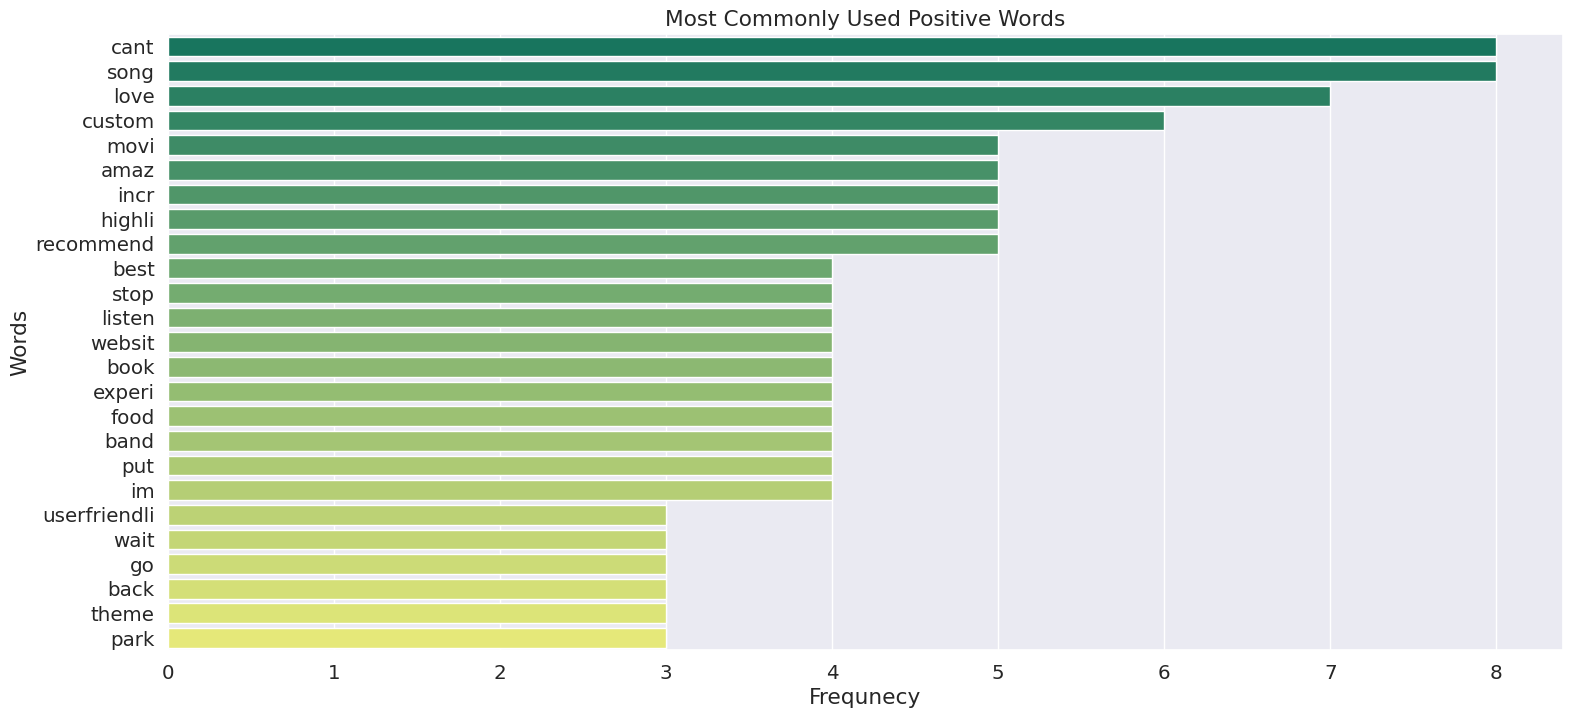

In [32]:
# Barplot by Top 25 Positive Words

all_positive_words = []
for sentence in data[data['Sentiment'] == ' Positive']['Text'].to_list():
    for word in sentence.split():
        all_positive_words.append(word)

df = pd.DataFrame(Counter(all_positive_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Positive Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

ISUUES:
1. +Ve and _ve few words are same (how to get rid of this?)

In [33]:
data.head(2)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Month,Day,Year,Total Words,Total Chars,Total Words After Transformation,text_transformed,Total_Words,Total_Chars,Total_Words_After_Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,6,15,2023,2,11,0.693147,LOVE PRODUCT,2,12,217
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,6,15,2023,2,13,0.693147,SERVIC TERRIBL,2,14,217


## Sentiment Classify with Text¶

In [30]:
# Remove leading and trailing whitespaces from the 'Sentiment' column
data['Sentiment'] = data['Sentiment'].str.strip()

# Adjust for possible variations in capitalization or spelling
data['Sentiment'] = data['Sentiment'].str.lower()  # Convert all strings to lowercase before replacing

# Perform the replacement
data['Sentiment'] = data['Sentiment'].replace({'negative': 0, 'positive': 1})


In [31]:
data.head(2)

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Month,Day,Year,Total Words,Total Chars,Total Words After Transformation
0,love product,1,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,6,15,2023,4,19,0.693147
1,servic terribl,0,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,6,15,2023,4,24,0.693147


In [32]:
data['Sentiment'].value_counts()

1    53
0    43
Name: Sentiment, dtype: int64

In [57]:
x = data['Text']
y = data['Sentiment'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=10)

In [58]:
tfidf = TfidfVectorizer(max_features=2500, min_df=2)

x_train = tfidf.fit_transform(x_test).toarray()
x_test = tfidf.transform(x_test).toarray()

In [59]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

Note: y_train

20
76
20
20


In [60]:
x_test

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.87289512, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.48790789, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.55948013, 0.        ,
        0.37320341, 0.        , 0.        , 0.        , 0.46246536,
        0.        , 0.        , 0.        , 0.50484424, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28099694,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.43389282, 0.        ,
        0.39152113, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [61]:
x_train.head(10)

#problem.,.,.

AttributeError: ignored

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn.rcmod import plotting_context
from sklearn.naive_bayes import MultinomialNB

# Model:1
### Navie Bayes

In [63]:
def train_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = ConfusionMatrixDisplay(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = roc_curve(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [65]:
nb = MultinomialNB()

train_model(nb)

train_model(nb, x_train, y_train, x_test, y_test)


ValueError: ignored